Create a network diagram that demonstrates how users move between chapters across all books within the dataset.

I spend a lot of time trying to import the python modules. The virtual enviroment defined in the project cloned from github didn't work.
I had to make another virtual environment, with more uptodate package versions (python 3.10.9, numpy 1.23.5, matplotlib 

In [2]:
import pandas as pd

In [3]:
import networkx as nx

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('datasets\dataset.csv')

In [7]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                4999 non-null   int64 
 1   number_of_ticks        4999 non-null   int64 
 2   date_created           4999 non-null   object
 3   chapter                4999 non-null   object
 4   book                   4999 non-null   object
 5   numberofentriesofbook  4999 non-null   int64 
 6   numberofusersofbook    4999 non-null   int64 
 7   product_manning_id     4999 non-null   int64 
 8   user_owns_book         4999 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.6+ KB


Create the edge: source (chapter + book)

In [9]:
df=df.sort_values(by=['user_id','date_created'])

In [10]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [11]:
df['source']=df['chapter']+df['book']

In [12]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,chapter-8bhargava
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8fain3
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,chapter-1thomas
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,about-this-bookprasanna


create the edge: target

In [13]:
#shift 1 row
df['target']=df['source'].shift(-1)

In [14]:
df[['user_id','source','target']].head()

,user_id,source,target
0,-2147277864,chapter-8bhargava,chapter-8fain3
1,-2146355313,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,chapter-1ramamurthy,chapter-1thomas
3,-2146355313,chapter-1thomas,about-this-bookprasanna
4,-2146168866,about-this-bookprasanna,chapter-4mcnamara


In [15]:
df['user_check']=df['user_id'].shift(-1)

In [16]:
#keep if user_id == user_check, else nan
df['keep_drop']=np.where((df['user_check']==df['user_id']),df['user_id'],np.nan)

In [17]:
df[['user_id','user_check','keep_drop','source','target']].head()

,user_id,user_check,keep_drop,source,target
0,-2147277864,-2.146355e+09,NaN,chapter-8bhargava,chapter-8fain3
1,-2146355313,-2.146355e+09,-2.146355e+09,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,-2.146355e+09,-2.146355e+09,chapter-1ramamurthy,chapter-1thomas
3,-2146355313,-2.146169e+09,NaN,chapter-1thomas,about-this-bookprasanna
4,-2146168866,-2.145887e+09,NaN,about-this-bookprasanna,chapter-4mcnamara


In [18]:
df = df.dropna(subset=['keep_drop'])

In [19]:
df[['user_id','user_check','keep_drop','source','target']].head()

,user_id,user_check,keep_drop,source,target
1,-2146355313,-2.146355e+09,-2.146355e+09,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,-2.146355e+09,-2.146355e+09,chapter-1ramamurthy,chapter-1thomas
29,-2145886989,-2.145887e+09,-2.145887e+09,chapter-4mcnamara,chapter-4mcnamara
32,-2145886989,-2.145887e+09,-2.145887e+09,chapter-4mcnamara,chapter-1mcnamara
7,-2145886989,-2.145887e+09,-2.145887e+09,chapter-1mcnamara,chapter-1mcnamara


Building the graph

In [20]:
#building the graph
G = nx.from_pandas_edgelist(df,'source','target',create_using=nx.DiGraph)

nx.draw(G) doesn't work in my installation.
I spend a lot of time trying to figure out what is wrong.
I gave up and use nx.draw_networkx(G) instead.

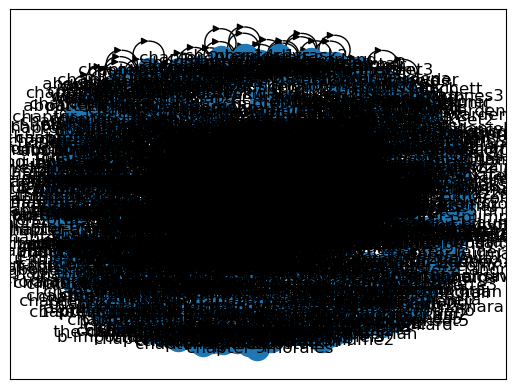

In [23]:
nx.draw_networkx(G)
plt.show()